# Логистическая регрессия для многоклассовой классификации

Будем решать задачу многоклассовой классификации на классическом датасете iris, в котором классы линейно разделимы -  значит логистическая регрессия даст хороший результат.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import ipdb

Загружаем датасет

In [2]:
iris = datasets.load_iris()

Подробнее изучить информацию о датасете можно либо загуглив,либо, к примеру так.

In [3]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

**1. Готовим данные для обучения. (1 балл)**   
Создайте матрицу признаков Х, которая убдет содержать состоит из (3) - petal length in cm и (4) - petal width in cm.  
Определите вектор классов у.  

In [12]:
# YOUR CODE HERE
x = iris.data
y = iris.target

**2. Визуализация данных (2 балла)**  
C помощью matplotlib и scatter plot визуализируйте датасет. Результат должен быть как на картинке. Цвета точек можно задать параметром c=y.
- Правильно построенные график - 1 балл.
- Подписанные оси - 1 балл.
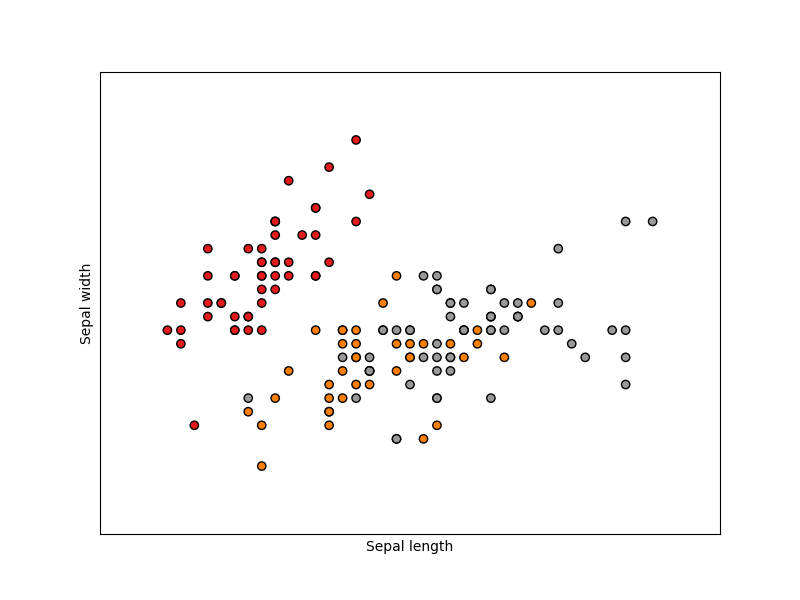


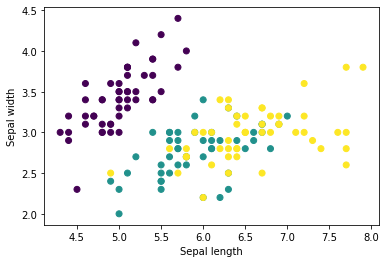

In [5]:
# YOUR CODE HERE
plt.scatter(x[:, 0], x[:,1], c=y, cmap='viridis')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()


Вспомним, что фукнция sigmoid имеет вид:
$$g(z) = {1 \over 1 + e^{-z}}$$


Функция гипотезы имеет вид:
$$h_ \theta(x) = g(\theta^T x)$$


In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

В качестве функции потерь мы в бинарной классификации используем бинарную кросс  (перекрёстнную) энтропию, которую считаем по формуле:
$$J(\theta) = {1 \over m} \sum\limits_ {i=1}^{m} [-y^{(i)} \log h_ \theta (x^{(i)}) - (1 - y^{(i)}) \log (1-h_ \theta (x^{(i)}))]$$

Кстати, чтобы понять, почему "перекрёстная",мы можем просто визуализировать её. Целевая переменная может принимать значения 1 или 0.

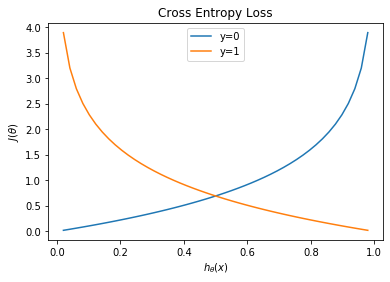

In [7]:
h = np.linspace(0, 1)[1:-1]
for y in [0, 1]:
    plt.plot(h, -y * np.log(h) - (1 - y) * np.log(1 - h), label=f"y={y}")
plt.title("Cross Entropy Loss") 
plt.xlabel('$h_ {\\theta}(x)$'); plt.ylabel('$J(\\theta)$')
plt.legend();

Мы можем видеть, что правильный прогноз класса будет значение функции потерь 0. При этом значение функции потерь стремится к бесконечности, когда прогноз ближе к неправильному классу.

Градиент бинарной бинарной кросс энтропии имеет вид:  
$${\partial J(\theta)\over \partial\theta} = {1 \over m} \sum\limits_ {i=1}^{m} (h_ \theta (x^{(i)})-y^{(i)})x^{(i)}$$

**3. Напишите функцию, которая возвращает значение функции ошибки ошибки и её градиента
 (3 балла)**

In [8]:
def cost(theta, x, y):
    h = sigmoid(x @ theta)
    m = len(y)
    # YOUR CODE HERE
#     ipdb.set_trace()
    cost = (1/m)* np.sum((-y * np.log(h)) - (np.ones_like(h) - y) @ np.log(np.ones_like(h) - h))
    # YOUR CODE HERE
    grad = (1/m) * np.sum((h - y) @ x)
    return cost, grad

**4. Напишите функцию fit(...) которая будет выполнять классификацию по стратегии [one-vs.-rest](https://en.wikipedia.org/wiki/Multiclass_classification#One-vs.-rest) (cost function)(1 балл)**  

Обновление параметров необходимо делать согласно градиентному спуску.

In [9]:
def fit(x, y, max_iter=5000, alpha=0.1):
    # a way to add a column of ones
    x = np.insert(x, 0, 1, axis=1)
    thetas = []
    classes = np.unique(y)
    costs = np.zeros(max_iter)
    step = round(max_iter / 10)

    for c in classes:
        # one vs. rest binary classification
        binary_y = np.where(y == c, 1, 0)
        theta = np.zeros(x.shape[1])
        class_cost = []

        for epoch in range(max_iter):
            # save costs, compute updated grad and theta 

            theta = theta - (alpha/len(y)) * (x.T @ (sigmoid(x @ theta) - binary_y))

#             ipdb.set_trace()
        
            error, grad = cost(theta, x, binary_y)
            costs[epoch] = error
            
            if(epoch % step == 0):
                print('Step {} ERROR: {}'.format(epoch / step, error))
                class_cost.append(error)
            # YOUR CODE HERE
            pass
        print('Class "{}" error: {}'.format(c, error) )
        plt.plot(class_cost)
        plt.show()
        thetas.append(theta)


    return thetas, classes, costs

**5. Напишите функцию predict(...), которая будет давать предсказания классов (дискретные значения) (3 балла).**

In [10]:
def predict(thetas, x):
    x = np.insert(x, 0, 1, axis=1)
    # YOUR CODE HERE
    preds = []
    classes = len(thetas)
    
    for t in thetas:
        class_pred =  sigmoid(x @ t.T)
        preds.append(class_pred)

    matrix = np.matrix(np.array(preds).round()).argmax(0)
    #  make ndarray great again!
    return np.array(matrix).reshape((len(x), ))


Запускаем тренировку и строим график функции потерь.

Step 0.0 ERROR: 67.88179126251856
Step 1.0 ERROR: 2.0887040832029187
Step 2.0 ERROR: 1.1299820446094282
Step 3.0 ERROR: 0.7879176723975396
Step 4.0 ERROR: 0.6099826064244415
Step 5.0 ERROR: 0.5001321293306903
Step 6.0 ERROR: 0.42523425115411784
Step 7.0 ERROR: 0.37073150622899964
Step 8.0 ERROR: 0.3291996364005718
Step 9.0 ERROR: 0.2964453107640778
Class "0" error: 0.2699188549872863


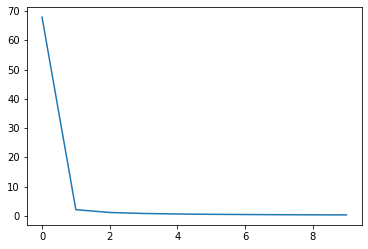

Step 0.0 ERROR: 68.6175634836407
Step 1.0 ERROR: 36.668570058497224
Step 2.0 ERROR: 35.779589829127794
Step 3.0 ERROR: 35.340070610076495
Step 4.0 ERROR: 35.1123085213413
Step 5.0 ERROR: 34.98854907181562
Step 6.0 ERROR: 34.9173727642593
Step 7.0 ERROR: 34.87321222869873
Step 8.0 ERROR: 34.84297650027749
Step 9.0 ERROR: 34.81984970307822
Class "1" error: 34.80027284537391


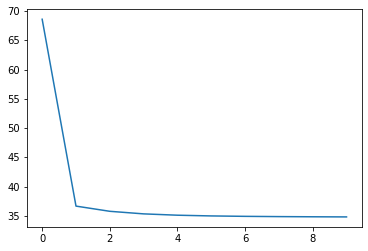

Step 0.0 ERROR: 68.96730741620665
Step 1.0 ERROR: 19.175621715572206
Step 2.0 ERROR: 14.96006276032702
Step 3.0 ERROR: 12.814840045751177
Step 4.0 ERROR: 11.495254907768992
Step 5.0 ERROR: 10.594894103878772
Step 6.0 ERROR: 9.937700118601427
Step 7.0 ERROR: 9.434621063805324
Step 8.0 ERROR: 9.035654688111352
Step 9.0 ERROR: 8.710498997522105
Class "2" error: 8.439710526650762


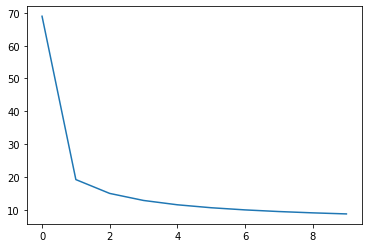

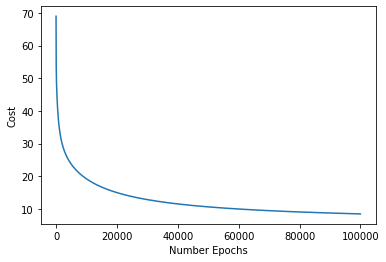

In [13]:
thetas, classes, costs = fit(x, y, alpha=0.002, max_iter= 100 * 1000)
plt.plot(costs)
plt.xlabel('Number Epochs'); plt.ylabel('Cost');


Посмотрим на линии, которые мы нашли в результате обучения модели и как они разделяют классы.
Если всё прошло правильно, то должно получиться нечно такое:
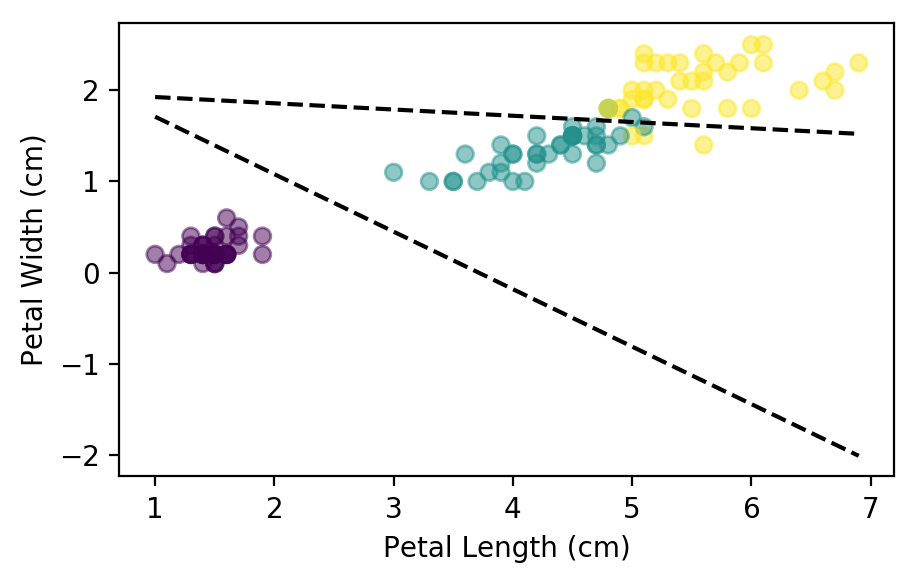

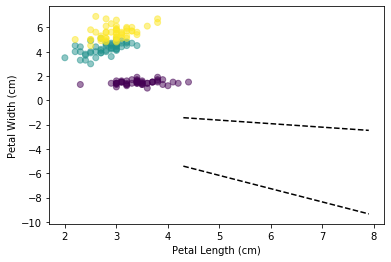

In [14]:
plt.scatter(x[:, 1], x[:, 2], c=y, alpha=0.5)
plt.xlabel("Petal Length (cm)"); plt.ylabel("Petal Width (cm)");

for theta in [thetas[0],thetas[2]]:
    j = np.array([x[:, 0].min(), x[:, 0].max()])

    # don't understand what happens here
    k = -(j * theta[1] + theta[0]) / theta[2]
#     ipdb.set_trace()
    plt.plot(j, k, color='k', linestyle="--")


In [ ]:
thetas

**6. Посчитайте точность классификации - accuracy.** 
    - Имплементируйте самостоятельно функцию accuracy - 1 балл  
    - Воспользуйтесь функцией sklearn.metrics.accuracy_score  - 1 балл

In [15]:
def manual_accuracy(x, thetas, y):
    
    # YOUR CODE HERE
    score = predict(thetas, x)
    return score

In [19]:
from sklearn.metrics import accuracy_score

def sklearn_accuracy(x, thetas, y):
    # YOUR CODE HERE
    y_pred = predict(thetas, x)
    is_equal = lambda y: int(bool(y[0] - y[1]))
    y_pred_vs_y = np.c_[y_pred, y, np.zeros_like(y)]
    y_test = np.array([ is_equal(y) for y in y_pred_vs_y])

    
    score = accuracy_score(y, y_test)
    return score
                         
sklearn_accuracy(x, thetas, y)

0.5333333333333333

In [ ]:
sklearn_accuracy(x, thetas[0], y)

**7. Выведите [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) классификации c помощью фукнции metrics.confusion_matrix (1 балл)**

In [ ]:
# YOUR CODE HERE

**7*. Какие классы больше всего модель путает между собой? Дать ответ в виде названия классов, а не [0,1,2] (2 балла)**

YOUR ANSWER HERE

**8. Посчитайте precision, recall, F-1 score для классификации классов 0 и 1.**
То есть задача сводится к подсчёту результата бинарной классификации.

    - Имплементируйте три метрики самостоятельно - 3 балла (по 1 баллу за каждую метрику) 
    - Воспользуйтесь функцией sklearn.metrics.precision_recall_fscore_support  - 3 балла (по 1 баллу за каждую метрику) 

**Вы молодец!  
Ноутбук - на гитхаб. Ссылку в LMS.**